---
# Space Weather Simulation Summer School Day 3 
Description: Working with various file types, data manipulation, data visualization \
Author: Peng Mun Siew
---

We will be using a lot of things that have been covered over the last two days with some minor variation. The goal of today's lesson is to get you comfortable with reading and writing data, doing simple data manipulation, and visualizing data.

## Refresher: Saving and loading variable

Python can work with most if not all file types. However, each data type requires a different method to load them. \
In this session, we will be looking at some common file types
- Numpy file (.npy) 
- Numpy zip archive/file (.npz) 
- Matlab file (.mat)
- Comma-separated values (.csv)
- Excel file

### Refresher: Writing and reading numpy file

In [1]:
# Importing the required packages
import numpy as np

# Generate a random array of dimension 10 by 5
data_arr = np.random.randn(10,5)
print(data_arr)

[[-0.06591464  0.18919278 -0.07666036 -0.9783146  -0.17835074]
 [ 1.13341911 -1.694209    0.81989704 -3.28060456 -0.387382  ]
 [ 1.18478041 -0.76336186  1.21374055 -1.25130106  0.57464124]
 [-0.56883636  1.74694451  0.17074032  0.07934484  0.66534425]
 [ 1.13097915 -0.76891736  0.24971794  0.41042002  0.50043181]
 [ 0.947598    0.57511692 -0.76695514  0.74910575  0.29348975]
 [ 1.38820997  0.54158383 -0.19272117  0.58230005 -1.06861337]
 [-0.95849958 -1.40850044  0.61657257  0.35764245 -0.43551945]
 [-1.35630309 -0.05559102  0.74788751 -0.50654026  0.39811959]
 [ 0.81247775 -0.50717406  0.70978481 -0.48229451  0.73496685]]


In [2]:
# Save the data_arr variable into a .npy file
np.save('test_np_save.npy',data_arr)

# Load data from a .npy file
data_arr_loaded = np.load('test_np_save.npy')

# Verification that the loaded data matches the initial data exactly
print(np.equal(data_arr,data_arr_loaded))

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


### Refresher: Writing and reading numpy zip archive/file
Zip or archive version of numpy file that allows us to store multiple variables

In [3]:
# Generate a second random array of dimension 8 by 1
data_arr2 = np.random.randn(8,1)
print(data_arr2)

# Save the data_arr and data_arr2 variables into a .npz file
np.savez('test_savez.npz', data_arr, data_arr2)

[[ 0.16851924]
 [ 0.32838445]
 [ 1.83903743]
 [ 0.53137095]
 [ 0.66015339]
 [-1.7180719 ]
 [ 0.01182946]
 [-0.57937332]]


In [4]:
# Load the numpy zip file
npzfile = np.load('test_savez.npz')

# Loaded file is not a numpy array, but is a Npzfile object. You are not able to print the values directly.
print(npzfile)

# To inspect the name of the variables within the npzfile
print('Variable names within this file:', sorted(npzfile.files))

Variable names within this file: ['arr_0', 'arr_1']


In [5]:
# We will then be able to use the variable name as a key to access the data.
print(npzfile['arr_0'])

# Verification that the loaded data matches the initial data exactly
print((data_arr==npzfile['arr_0']).all())
print((data_arr2==npzfile['arr_1']).all())

[[-0.06591464  0.18919278 -0.07666036 -0.9783146  -0.17835074]
 [ 1.13341911 -1.694209    0.81989704 -3.28060456 -0.387382  ]
 [ 1.18478041 -0.76336186  1.21374055 -1.25130106  0.57464124]
 [-0.56883636  1.74694451  0.17074032  0.07934484  0.66534425]
 [ 1.13097915 -0.76891736  0.24971794  0.41042002  0.50043181]
 [ 0.947598    0.57511692 -0.76695514  0.74910575  0.29348975]
 [ 1.38820997  0.54158383 -0.19272117  0.58230005 -1.06861337]
 [-0.95849958 -1.40850044  0.61657257  0.35764245 -0.43551945]
 [-1.35630309 -0.05559102  0.74788751 -0.50654026  0.39811959]
 [ 0.81247775 -0.50717406  0.70978481 -0.48229451  0.73496685]]
True
True


### Error and Exception
It is a good practice to incorporate try and except block to catch and handle exception. It makes your code more robust and can quickly inform the user the cause of the error.
<br><br>
Normally, a Python program will terminate immediately when it encounters an error. In python, an error can be a syntax error or an runtime error.
<br><br>
Common Python Syntax error includes:
- Incorrect statement
- Leaving out an argument (keyword)
- Putting an argument (keyword) in the wrong place
- leaving out a symbol, such as a colon, comma or brackets
- misspelling a keyword
- incorrect indentation
<br><br>

Common runtime error includes:
- division by zero
- using a variable which has not been defined
- accessing a list element, dictionary value or object attribute which doesn’t exist
- trying to access a file which doesn’t exist
- performing an operation on incompatible types; doing operation on list

We can use try and except block to handle runtime error.

In [6]:
np.equal(data_arr,npzfile)

UFuncTypeError: Cannot cast ufunc 'equal' input 1 from dtype('<U5') to dtype('float64') with casting rule 'same_kind'

In [7]:
# Exception handling, can be use with assertion as well
try:
    # Python will try to execute any code here, and if there is an exception skip to below 
    print(np.equal(data_arr,npzfile).all())
except:
    # Execute this code when there is an exception
    print("The provided variable is a npz object.")
    print(np.equal(data_arr,npzfile['arr_0']).all())

The provided variable is a npz object.
True


Note: It is possible to program our code such that it will throw an error (exception) when a certain condition occurs using 'raise Exception'

### Loading data from Matlab
Before getting started, please download the following data: https://drive.google.com/drive/folders/113-QpJuWpePkGaDoLW-ipfwJWSDSNoPJ?usp=sharing

In [8]:
# Importing required packages
import numpy as np
from scipy.io import loadmat

dir_density_Jb2008 = 'Data/JB2008/2002_JB2008_density.mat'

In [9]:
# Load Density Data
try:
    loaded_data = loadmat(dir_density_Jb2008)
except:
    print("File not found. Please make sure you have input the correct directory")

In [10]:
# This is the format of the loaded matlab data and it contains metadata in addition to our data.
print(loaded_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jun 15 10:35:22 2019', '__version__': '1.0', '__globals__': [], 'densityData': array([[4.06971750e-07, 4.06920894e-07, 4.06934226e-07, ...,
        4.09017779e-07, 4.09165780e-07, 4.09178664e-07],
       [4.06973497e-07, 4.06922598e-07, 4.06935930e-07, ...,
        4.09020259e-07, 4.09168349e-07, 4.09181234e-07],
       [4.06974135e-07, 4.06923219e-07, 4.06936551e-07, ...,
        4.09021161e-07, 4.09169284e-07, 4.09182169e-07],
       ...,
       [5.08508667e-14, 5.59098568e-14, 5.58913005e-14, ...,
        7.30241773e-15, 6.57333495e-15, 6.57299333e-15],
       [5.05668614e-14, 5.56047456e-14, 5.55862498e-14, ...,
        7.27105662e-15, 6.54589580e-15, 6.54555141e-15],
       [5.03743431e-14, 5.53978833e-14, 5.53794185e-14, ...,
        7.24983079e-15, 6.52732329e-15, 6.52697610e-15]])}


In [11]:
# Unable to get the shape of the density data
# This is because this is a dictionary object
print(loaded_data.shape)

AttributeError: 'dict' object has no attribute 'shape'

In [12]:
# Uses key to extract our data of interest
JB2008_dens = loaded_data['densityData']

# The shape command now works
print(JB2008_dens.shape) # Density_state x timestep (Hours)

(17280, 8760)


## Data visualization

Before we can visualize our density data, we first need to generate the discretization grid of the density data in 3D space.\
We will be using np.linspace to create evenly sapce data between the limits.

In [13]:
localSolarTimes_JB2008 = np.linspace(0,24,24)
latitudes_JB2008 = np.linspace(-87.5,87.5,20)
altitudes_JB2008 = np.linspace(100,800,36)
nofAlt_JB2008 = altitudes_JB2008.shape[0]
nofLst_JB2008 = localSolarTimes_JB2008.shape[0]
nofLat_JB2008 = latitudes_JB2008.shape[0]

When using linspace, we can also impose additional constraints such as forcing the values to be integers.

In [14]:
time_array_JB2008 = np.linspace(0,8760,20, dtype = int)

In [15]:
# Each data correspond to the density at a point in 3D space. 
# We can recover the density field by reshaping the array.
# For the dataset that we will be working with today, you will need to reshape them to be lst x lat x altitude
JB2008_dens_reshaped = np.reshape(JB2008_dens,(nofLst_JB2008,nofLat_JB2008,nofAlt_JB2008,8760), order='F')
# order = 'F' - row major

Text(0.5, 0, 'Local Solar Time')

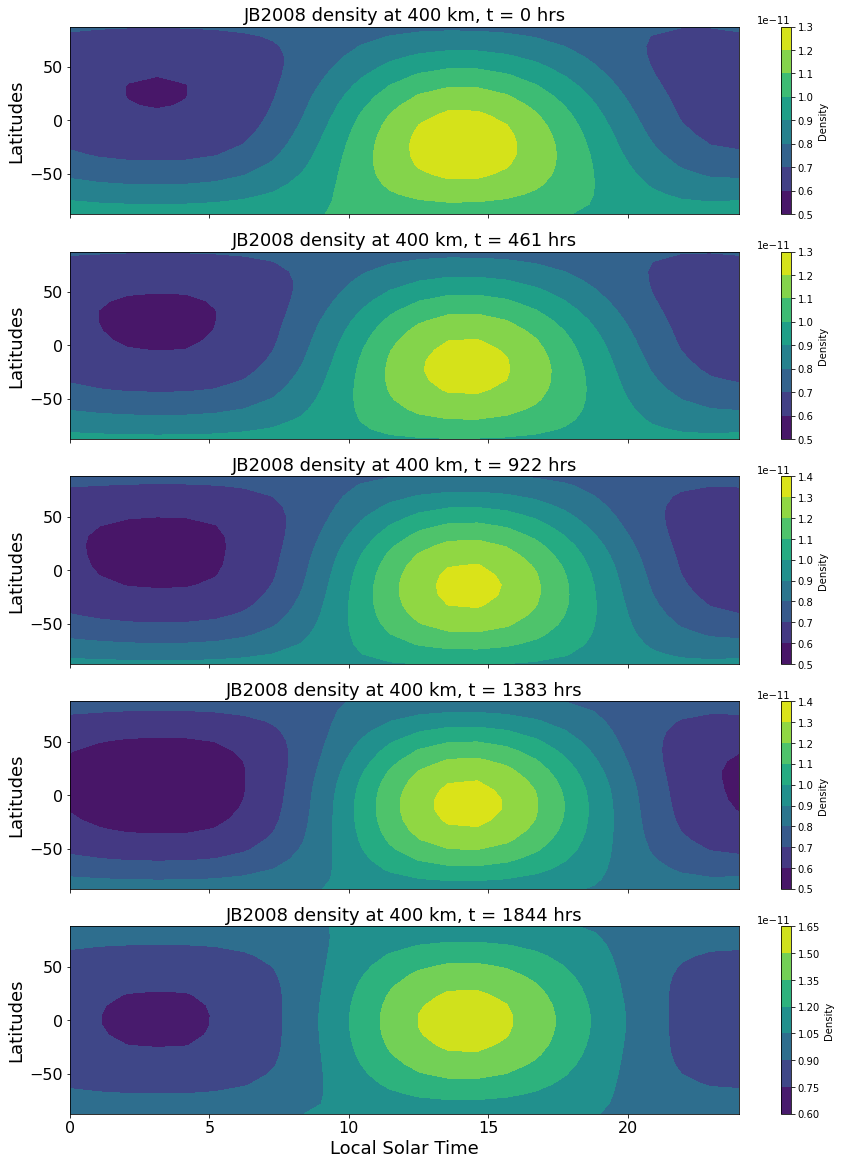

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Look for data that correspond to an altitude of 400 KM
alt = 400
hi = np.where(altitudes_JB2008==alt)

# Create a canvas to plot our data on. Here we are using a subplot with 5 spaces for the plots.
fig, axs = plt.subplots(5, figsize=(15, 10*2), sharex=True)

for ik in range (5):
    cs = axs[ik].contourf(localSolarTimes_JB2008, latitudes_JB2008, JB2008_dens_reshaped[:,:,hi,time_array_JB2008[ik]].squeeze().T)
    axs[ik].set_title('JB2008 density at 400 km, t = {} hrs'.format(time_array_JB2008[ik]), fontsize=18)
    axs[ik].set_ylabel("Latitudes", fontsize=18)
    axs[ik].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    # Make a colorbar for the ContourSet returned by the contourf call.
    cbar = fig.colorbar(cs,ax=axs[ik])
    cbar.ax.set_ylabel('Density')

axs[ik].set_xlabel("Local Solar Time", fontsize=18)    

### Assignment 1: Can you plot the mean density for each altitude at February 1st, 2002?
We need to first identify the time index that corresponds to February 1st \
Note: the data are generated at an hour interval from 00:00 January 1st, 2002

In [17]:
time_index = 31*24
JB2008_dens_feb1 = JB2008_dens_reshaped[:,:,:,time_index]

#### Hint 1: Use np.mean with the axis argument

In [18]:
# Generate a random array of dimension 10 by 5
data_arr = np.random.randn(2,5)
print(data_arr)

print('The mean of all elements is: ',np.mean(data_arr))
print('The mean along the 0 axis is: ',np.mean(data_arr, axis = 0))

[[ 2.78057075 -0.75032063 -0.99220056 -1.5035186  -0.88094796]
 [-1.88159873  0.75127701  0.63183778  1.15011468 -0.86182794]]
The mean of all elements is:  -0.15566141869854497
The mean along the 0 axis is:  [ 4.49486010e-01  4.78190558e-04 -1.80181389e-01 -1.76701957e-01
 -8.71387948e-01]


## Now we will read the TIE-GCM data and plot out the density field at 310km.
Note: TIE-GCM data uses a slightly different discretization and file format. Solve for the correct shape based on the length of the altitudes, latitudes, and localSolarTimes vector.

In [21]:
import h5py

loaded_data = h5py.File('Data/TIEGCM/2002_TIEGCM_density.mat')

In [22]:
# This is a HDF5 dataset object, some similarity with a dictionary
print('Key within database:',list(loaded_data.keys()))

Key within database: ['altitudes', 'density', 'latitudes', 'localSolarTimes']


## Data visualization

Before we can visualize our density data, we first need to generate the discretization grid of the density data in 3D space.\
We will be using np.linspace to create evenly sapce data between the limits.

In [23]:
tiegcm_dens = (10**np.array(loaded_data['density'])*1000).T # convert from g/cm3 to kg/m3
altitudes_tiegcm = np.array(loaded_data['altitudes']).flatten()
latitudes_tiegcm = np.array(loaded_data['latitudes']).flatten()
localSolarTimes_tiegcm = np.array(loaded_data['localSolarTimes']).flatten()
nofAlt_tiegcm = altitudes_tiegcm.shape[0]
nofLst_tiegcm = localSolarTimes_tiegcm.shape[0]
nofLat_tiegcm = latitudes_tiegcm.shape[0]

When using linspace, we can also impose additional constraints such as forcing the values to be integers.

In [24]:
time_array_tiegcm = np.linspace(0,8760,20, dtype = int)

In [25]:
# Each data correspond to the density at a point in 3D space. 
# We can recover the density field by reshaping the array.
# For the dataset that we will be working with today, you will need to reshape them to be lst x lat x altitude
tiegcm_dens_reshaped = np.reshape(tiegcm_dens,(nofLst_tiegcm,nofLat_tiegcm,nofAlt_tiegcm,8760), order='F')

Text(0.5, 0, 'Local Solar Time')

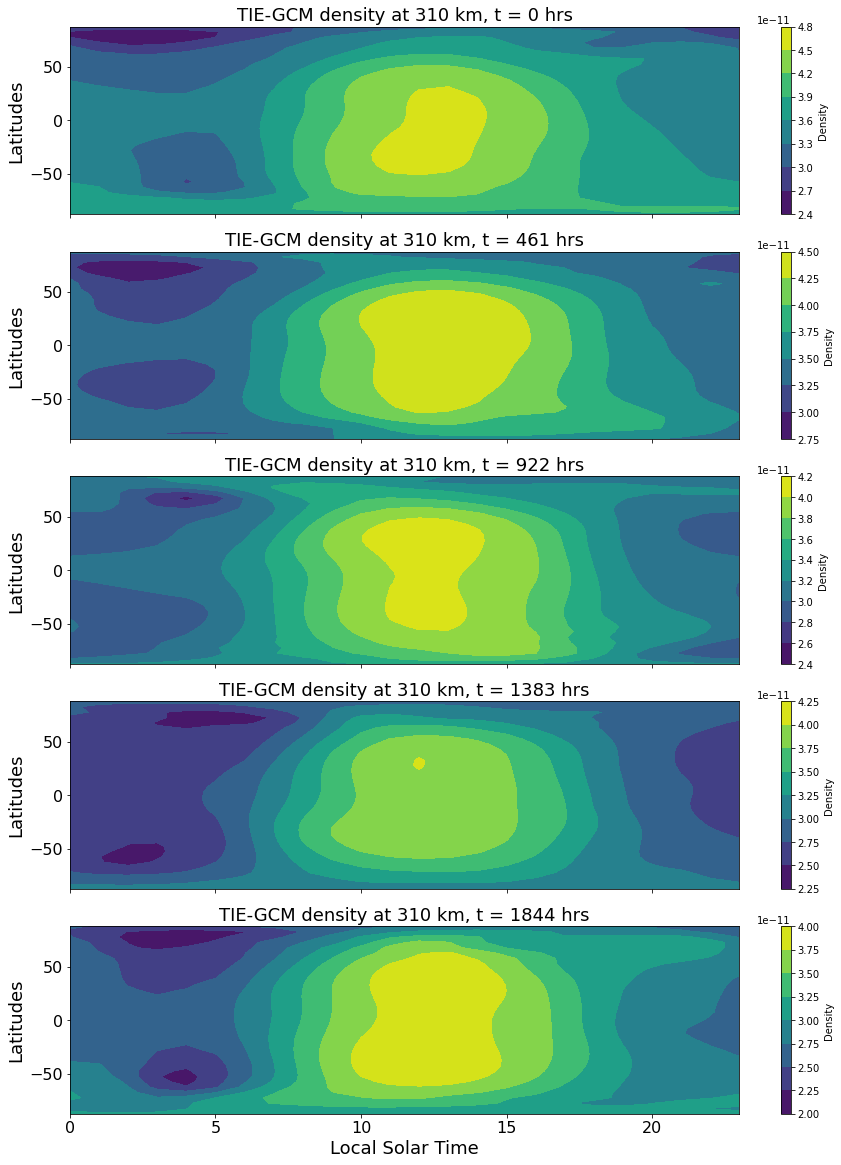

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 100
alt = 310
hi = np.where(altitudes_tiegcm==alt)

# Create a canvas to plot our data on. Here we are using a subplot with 5 spaces for the plots.
fig, axs = plt.subplots(5, figsize=(15, 10*2), sharex=True)

for ik in range (5):
    cs = axs[ik].contourf(localSolarTimes_tiegcm, latitudes_tiegcm, tiegcm_dens_reshaped[:,:,hi,time_array_tiegcm[ik]].reshape(nofLst_tiegcm,nofLat_tiegcm).T)
    axs[ik].set_title('TIE-GCM density at 310 km, t = {} hrs'.format(time_array_tiegcm[ik]), fontsize=18)
    axs[ik].set_ylabel("Latitudes", fontsize=18)
    axs[ik].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    # Make a colorbar for the ContourSet returned by the contourf call.
    cbar = fig.colorbar(cs,ax=axs[ik])
    cbar.ax.set_ylabel('Density')

axs[ik].set_xlabel("Local Solar Time", fontsize=18)    

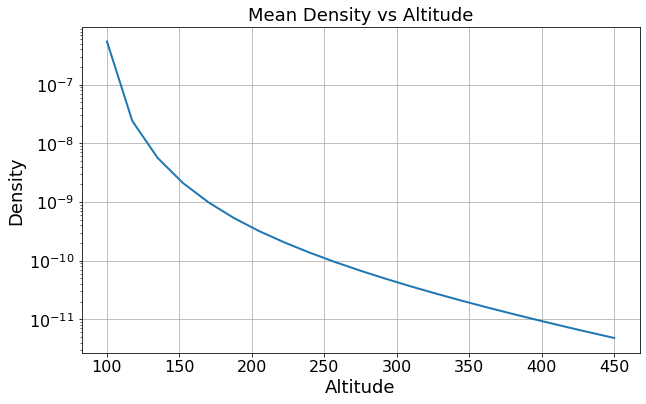

In [27]:
tiegcm_dens_feb1 = tiegcm_dens_reshaped[:,:,:,time_index]
tiegcm_dens_feb1_alt = np.mean(tiegcm_dens_feb1, axis=(0,1))

plt.subplots(1, figsize=(10, 6))
plt.semilogy(altitudes_tiegcm,tiegcm_dens_feb1_alt,linewidth = 2)
plt.xlabel('Altitude', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title('Mean Density vs Altitude', fontsize=18)
plt.grid()
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

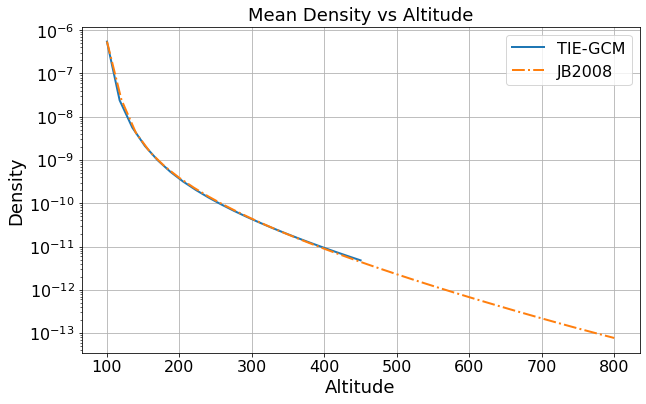

In [28]:
plt.subplots(1, figsize=(10, 6))
plt.semilogy(altitudes_tiegcm,tiegcm_dens_feb1_alt,linewidth = 2,label='TIE-GCM')
plt.semilogy(altitudes_JB2008,JB2008_dens_feb1_alt,'-.',linewidth = 2,label='JB2008')
plt.xlabel('Altitude', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title('Mean Density vs Altitude', fontsize=18)
plt.grid()
plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

### 1D Interpolation

In [29]:
from scipy import interpolate

x = np.arange(0, 10)
y = np.exp(-x/3.0)
interp_func_1D = interpolate.interp1d(x, y)

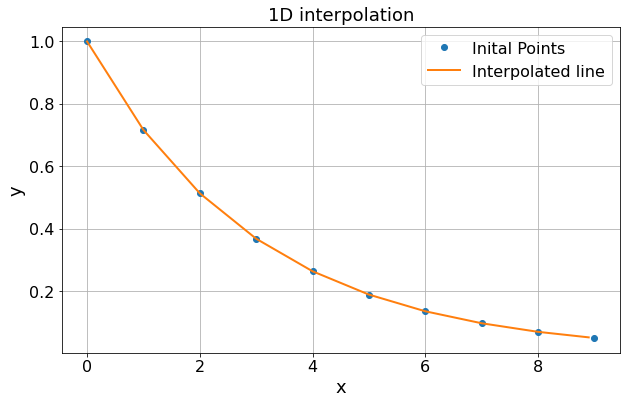

In [30]:
xnew = np.arange(0, 9, 0.1)
ynew = interp_func_1D(xnew)   # use interpolation function returned by `interp1d`
plt.subplots(1, figsize=(10, 6))
plt.plot(x, y, 'o', xnew, ynew, '-',linewidth = 2)
plt.legend(['Inital Points','Interpolated line'], fontsize = 16)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('1D interpolation', fontsize=18)
plt.grid()
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

### 3D interpolation using RegularGridInterpolator from the scipy.interpolate package

In [31]:
from scipy.interpolate import RegularGridInterpolator

# First create a set of sample data that we will be using 3D interpolant on
def function_1(x, y, z):
    return 2 * x**3 + 3 * y**2 - z

x = np.linspace(1, 4, 11)
y = np.linspace(4, 7, 22)
z = np.linspace(7, 9, 33)
xg, yg ,zg = np.meshgrid(x, y, z, indexing='ij', sparse=True)

sample_data = function_1(xg, yg, zg)

In [32]:
# Generate Interpolant (interpolating function)
interpolated_function_1 = RegularGridInterpolator((x, y, z), sample_data)

In [33]:
# Say we are interested in the points [[2.1, 6.2, 8.3], [3.3, 5.2, 7.1]]
pts = np.array([[2.1, 6.2, 8.3], [3.3, 5.2, 7.1]])
print(interpolated_function_1(pts))
print(function_1(pts[:,0],pts[:,1],pts[:,2]))

[125.80469388 146.30069388]
[125.542 145.894]


### Saving .mat file

In [34]:
from scipy.io import savemat

a = np.arange(20)
mdic = {"a": a, "label": "experiment"} # Using dictionary to store multiple variables
savemat("matlab_matrix.mat", mdic)

## Assignment 2
### 2(a) Use 3D interpolation to evaluate the TIE-GCM density field at 400km with the grid discretization used for JB2008 density data on the February 1st of 2002, and then plot out the density from both model (TIE-GCM and JB2008) for that day.

#### Hint 1: Instead of manually formulating the 3D points, you can use meshgrid to quickly generate the 3D points for the discretized grid

In [36]:
import numpy as np

x = np.linspace(0, 1, 3)
y = np.linspace(0, 1, 2)
xy = np.meshgrid(x, y)
print(np.array(xy))

[[[0.  0.5 1. ]
  [0.  0.5 1. ]]

 [[0.  0.  0. ]
  [1.  1.  1. ]]]


## 2(b) Find the difference between both density model on the February 1st, 2002 and plot out their differences.

## 2(c) Calculate the absolute percentage difference between the JB2008 data and GITM data